In [2]:
import pandas as pd


# =============================================================================
# importing dataset
# =============================================================================

data = pd.read_csv('../artifacts/dataset.csv')

data.head()


,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [3]:
columns = ['Score','Text','Full_text']

data.columns = columns

data = data.sample(frac=0.005, random_state=42)

In [4]:
data.head()

,Score,Text,Full_text
3493923,2,Very disappointed,My son got this toy for his birthday. The kids...
2472516,1,Doesn't help with cats or dogs!,A person I work with highly recommended it. He...
2110064,1,Don't waste your money on this DVD,This DVD is real old school and cheezeball. Ba...
2762210,1,EZEKIEL 13,Mr. Spong has attempted to reduce God to base ...
1438189,1,Won't fit your case.,I am the fourth review and the third to compla...


[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


43659
5042


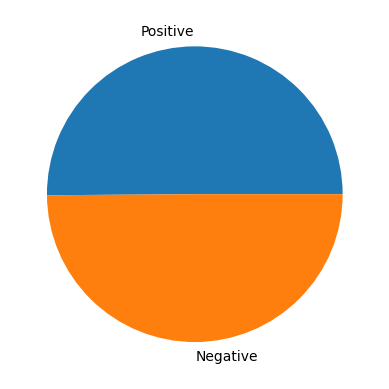

===========  Logistic Regression  ==============


E:\enfection\internal_product\Sentiment_analysis\sentiment_analysis_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Scores:
	Accuracy = 0.934
	Precision = 0.93
	Recall = 0.938
	F1-Score = 0.934
Testing Scores:
	Accuracy = 0.811
	Precision = 0.811
	Recall = 0.826
	F1-Score = 0.818
===========  Naive Bayes  ==============
Training Scores:
	Accuracy = 0.856
	Precision = 0.855
	Recall = 0.856
	F1-Score = 0.856
Testing Scores:
	Accuracy = 0.803
	Precision = 0.816
	Recall = 0.798
	F1-Score = 0.807
===========  Decision Tree  ==============
Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.696
	Precision = 0.72
	Recall = 0.669
	F1-Score = 0.694
===========  Random Forest  ==============
Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.802
	Precision = 0.832
	Recall = 0.772
	F1-Score = 0.801


In [17]:
# =============================================================================
# removing duplicates and null values
# =============================================================================

data = data[~data.duplicated()]

data.isnull().sum()

del data['Text']

# =============================================================================
# text preprocessing
# =============================================================================


import re
import string

##########  convert uppercaser to lowercase  #######################

data['Full_text'] = data['Full_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

##########  remove links                     ########################


data['Full_text'] = data['Full_text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags = re.MULTILINE) for x in x.split()))                              


###########  convert emojis into texts  #############################

import emoji


def convert_emojis_to_words(text):
    

    # Convert emojis to words using emoji.demojize
    text_with_emojis_as_words = emoji.demojize(text, delimiters=(' ', ' '))

    return text_with_emojis_as_words

data['Full_text'] = data['Full_text'].apply(convert_emojis_to_words)


########### Remove Punctuations ######################################


def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["Full_text"] = data["Full_text"].apply(remove_punctuations)


########### Removing numbers  ########################################

data["Full_text"] = data['Full_text'].str.replace('\d+', '', regex=True)


########### Removing stopwords  ######################################

import nltk

nltk.download('stopwords', download_dir='../static/model')

with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
    
    
data["Full_text"] = data["Full_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


########### Stemming              ###################################


from nltk.stem import PorterStemmer

ps = PorterStemmer()

data["Full_text"] = data["Full_text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))


##########   Building Vocabulary   ################################# 

from collections import Counter

vocab = Counter()

for  sentence in data['Full_text']:
    vocab.update(sentence.split())
        


print(len(vocab))

tokens = [key for key in vocab if vocab[key]>10]


print(len(tokens))

def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')


# =============================================================================
# splitting dataset -- test  = 20%
# =============================================================================
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Assuming 'Full_text' is the column containing text and 'Score' is the sentiment label
X = data['Full_text']
Y = data['Score']

# Encode the labels using LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# =============================================================================
# Vectorization
# =============================================================================

import numpy as np

def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new



vectorized_x_train = vectorizer(X_train, tokens)

vectorized_x_test = vectorizer(X_test, tokens)



# =============================================================================
# checking balance
# =============================================================================

import matplotlib.pyplot as plt

# Assuming Y_train is a NumPy array
unique_labels, counts = np.unique(Y_train, return_counts=True)

# Map integer labels to corresponding class names
class_names = ['Positive', 'Negative']  # Replace with your actual class names

# Plotting a pie chart
plt.pie(counts, labels=[class_names[label] for label in unique_labels])
plt.show()

# =============================================================================
# # =============================================================================
# # handling imbalnce 
# # =============================================================================
# from imblearn.over_sampling import SMOTE
# 
# unique_labels_before, counts_before = np.unique(Y_train, return_counts=True)
# class_names = ['Positive', 'Negative']  # Replace with your actual class names
# plt.pie(counts_before, labels=[class_names[label] for label in unique_labels_before])
# plt.title('Class Distribution Before SMOTE')
# plt.show()
# 
# import numpy as np
# 
# # Create an instance of SMOTE
# smote = SMOTE(random_state=42)
# 
# # Resample the training data using SMOTE
# vectorized_x_train_smote, Y_train_smote = smote.fit_resample(vectorized_x_train, Y_train)
# 
# # Check the new class distribution
# unique_labels_after, counts_after = np.unique(Y_train_smote, return_counts=True)
# print("Class Distribution After SMOTE:")
# for label, count in zip(unique_labels_after, counts_after):
#     print(f"Class {label}: {count} samples")
# 
# 
# =============================================================================
# =============================================================================
# Model Training and Evaluation
# =============================================================================


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

##########    Logistic Regression   #############################   
print("===========  Logistic Regression  ==============")
logistic_model = LogisticRegression()

logistic_model.fit(vectorized_x_train,Y_train)

y_train_pred = logistic_model.predict(vectorized_x_train)

y_test_pred = logistic_model.predict(vectorized_x_test)

training_scores(Y_train, y_train_pred)

validation_scores(Y_test, y_test_pred)
    
    
    
###########  Naive Bayes  ########################################

print("===========  Naive Bayes  ==============")

mnb = MultinomialNB()
mnb.fit(vectorized_x_train,Y_train)

y_train_pred = mnb.predict(vectorized_x_train)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(Y_train, y_train_pred)

validation_scores(Y_test, y_test_pred)

###############   Decision Tree  ############################

print("===========  Decision Tree  ==============")

dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train,Y_train)

y_train_pred = dt.predict(vectorized_x_train)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(Y_train, y_train_pred)

validation_scores(Y_test, y_test_pred)

################  Random Forest  #############################

print("===========  Random Forest  ==============")


rf = RandomForestClassifier()

rf.fit(vectorized_x_train,Y_train)

y_train_pred = rf.predict(vectorized_x_train)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(Y_train, y_train_pred)

validation_scores(Y_test, y_test_pred)


#############  Support Vector Machine   ###################


# print("=========== Support Vector Machine  ==============")

# svm = SVC()
# svm.fit(vectorized_x_train,Y_train)

# y_train_pred = svm.predict(vectorized_x_train)

# y_test_pred = svm.predict(vectorized_x_test)

# training_scores(Y_train, y_train_pred)

# validation_scores(Y_test, y_test_pred)


# =============================================================================
# saving the model
# =============================================================================
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(mnb, file)
 


 
    